**Il committente richiede di avere un report su casi e vaccinazioni in diverse aree del mondo; a tal fine, richiede di utilizzare il dataset, curato da Our World in Data, all'indirizzo https://github.com/owid/covid-19-data/tree/master/public/data alla voce " Download ourcomplete COVID-19 dataset"scaricare il dataset nel formato che si preferisce.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Covid_19 = pd.read_csv(r'https://covid.ourworldindata.org/data/owid-covid-data.csv')
Covid_19

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


1. Si richiede di verificare le dimensioni del dataset e i relativi metadati;
2. Si chiede di trovare, per ogni continente:
    a. il numero di casi fin dall'inizio della pandemia;
    b. la percentuale rispetto al totale mondiale del numero di casi.
3. Selezionare i dati relativi all'Italia nel 2022 e mostrare con dei grafici adeguati:
    a. l'evoluzione del casi totali dall'inizio alla fine dell'anno;
    b. il numero di nuovi casi rispetto alla data;
        k. poiché i nuovi casi vengono registrati settimanalmente, filtrare via i dati che non hanno misurazioni.
4. Riguardo le nazioni di Italia, Germania e Francia mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso):
    a. scrivere un breve commento a riguardo.
5. Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2023:
    a. mostrare la somma dei pazienti ospitalizzati per ognuna;
    b. se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno.

# 1. Si richiede di verificare le dimensioni del dataset e i relativi metadati;

In [2]:
print(f'I metadati del dataset sono:')
print('\n')
metadati_dataset = Covid_19.info()
print('\n')

dimensioni_dataset = Covid_19.shape
print(f'Le dimensioni del dataset sono: {dimensioni_dataset}')

I metadati del dataset sono:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                    

In [3]:
#CONTROLLO DEI VALORI NULLI:
#     Covid_19.isna().sum()

#NON SI LEGGONO TUTTE LE COLONNE, PER QUESTO CREO UN CICLO FOR:
for colonna in Covid_19:
    print(colonna)
    print(Covid_19[colonna].isna().sum())

iso_code
0
continent
26525
location
0
date
0
total_cases
17631
new_cases
19276
new_cases_smoothed
20506
total_deaths
17631
new_deaths
18827
new_deaths_smoothed
20057
total_cases_per_million
17631
new_cases_per_million
19276
new_cases_smoothed_per_million
20506
total_deaths_per_million
17631
new_deaths_per_million
18827
new_deaths_smoothed_per_million
20057
reproduction_rate
244618
icu_patients
390319
icu_patients_per_million
390319
hosp_patients
388779
hosp_patients_per_million
388779
weekly_icu_admissions
418442
weekly_icu_admissions_per_million
418442
weekly_hosp_admissions
404938
weekly_hosp_admissions_per_million
404938
total_tests
350048
new_tests
354032
total_tests_per_thousand
350048
new_tests_per_thousand
354032
new_tests_smoothed
325470
new_tests_smoothed_per_thousand
325470
positive_rate
333508
tests_per_case
335087
tests_units
322647
total_vaccinations
344018
people_vaccinated
348303
people_fully_vaccinated
351374
total_boosters
375835
new_vaccinations
358464
new_vaccination

In [4]:
#TRASFORMAZIONE DEL FORMATO DATO DELLA COLONNA DATE IN UN FORMATO DATA:
Covid_19['date'] = pd.to_datetime(Covid_19['date'] , format = '%Y-%m-%d')
Covid_19['date'].dtype

dtype('<M8[ns]')

# 2 Si chiede di trovare, per ogni continente:
     a. il numero di casi fin dall'inizio della pandemia;
     b. la percentuale rispetto al totale mondiale del numero di casi.

In [5]:
#HO LETTO DAL SITO LA DESCRIZIONE DELLE COLONNE.
#HO ANCHE CONTROLLATO LE COLONNE TOTAL CASES E NEW CASES, NOTANDO CHE TOTAL CASES SOMMA QUELLA DEI NEW CASES DI VOLTA IN VOLTA:
Italia = Covid_19.location == 'Italy'
Covid_19[Italia].head(40)
#ES.: RIGA 185306

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
185275,ITA,Europe,Italy,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,27.8,NaN,3.18,83.51,0.892,59037472,-1904.1,-12.37,-12.37,-32.00137
185276,ITA,Europe,Italy,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
185277,ITA,Europe,Italy,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
185278,ITA,Europe,Italy,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
185279,ITA,Europe,Italy,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
185280,ITA,Europe,Italy,2020-01-10,0.0,0.0,0.000,0.0,0.0,0.0,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
185281,ITA,Europe,Italy,2020-01-11,0.0,0.0,0.000,0.0,0.0,0.0,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
185282,ITA,Europe,Italy,2020-01-12,0.0,0.0,0.000,0.0,0.0,0.0,...,27.8,NaN,3.18,83.51,0.892,59037472,-3614.4,-11.63,-10.90,-60.74563
185283,ITA,Europe,Italy,2020-01-13,0.0,0.0,0.000,0.0,0.0,0.0,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
185284,ITA,Europe,Italy,2020-01-14,0.0,0.0,0.000,0.0,0.0,0.0,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN


In [54]:
#HO PRIMA CALCOLATO I CASI TOTALI PER CONTINENTI
#(HO USATO QUESTO CODICE PER UN RISULTATO PIU PULITO)
casi_continenti = Covid_19.groupby('continent').new_cases.agg(total_cases = ('sum'))   

#(ALTRIMENTI POTREMMO USARE SEMPLICEMENTE QUESTO)
# Covid_19.groupby('continent').new_cases.sum()

#POI LI HO SOMMATI PER UNA PER OTTENERE IL TOTALE MONDIALE
tot_casi_mondiali = casi_continenti.sum()
tot_casi_mondiali = int(tot_casi_mondiali)

print(f'I casi, in tutto il mondo, di Covid-19 sono: {tot_casi_mondiali}')

#CREANDO SUCCESSIVAMENTE LA COLONNA DELLE PERCENTUALI
casi_continenti['% Mondiale'] = round(Covid_19.groupby('continent')['new_cases'].agg(total_cases = ('sum')) / tot_casi_mondiali * 100 , 2)   #ARROTONDATO DI  2 CIFRE DECIMALI

#HO CONVERTITO I FLOAT IN INTERI DATO CHE RESTITUIVANO TUTTI VALORI DECIMALI CON LO ZERO
casi_continenti['total_cases'] = casi_continenti['total_cases'].astype('int')                             
casi_continenti

I casi, in tutto il mondo, di Covid-19 sono: 775935057


C:\Users\alfim\AppData\Local\Temp\ipykernel_109652\643512006.py:10: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  tot_casi_mondiali = int(tot_casi_mondiali)


,total_cases,% Mondiale
continent,,
Africa,13146831,1.69
Asia,301564180,38.86
Europe,252916868,32.60
North America,124492698,16.04
Oceania,15003468,1.93
South America,68811012,8.87


In [7]:
#ANALISI AGGIUNTIVA: STATO PER CONTINENTE
Covid_19.groupby(['continent' , 'location']).new_cases.agg(total_cases = ('sum'))

total_cases
continent     location                 
Africa        Algeria          272139.0
              Angola           107481.0
              Benin             28036.0
              Botswana         330696.0
              Burkina Faso      22139.0
...                                 ...
South America Paraguay         735759.0
              Peru            4526977.0
              Suriname          82501.0
              Uruguay         1041346.0
              Venezuela        552695.0

[243 rows x 1 columns]

# 3. Selezionare i dati relativi all'Italia nel 2022 e mostrare con dei grafici adeguati:
    a. l'evoluzione dei casi totali dall'inizio alla fine dell'anno;
    b. il numero di nuovi casi rispetto alla data;
        k. poiché i nuovi casi vengono registrati settimanalmente, filtrare via i dati che non hanno misurazioni.

In [8]:
#CREAZIONE DELLA MASCHERA:
filtro_italia = Covid_19.location == 'Italy'
filtro_2022 = Covid_19.date.dt.year == 2022

filtro_italia_2022 = Covid_19[filtro_italia][filtro_2022]
maschera_italia_2022 = filtro_italia_2022.loc[: , ['location' , 'date' , 'total_cases' , 'new_cases']]

#HO CONVERTITO I FLOAT IN INTERI DATO CHE RESTITUIVANO TUTTI VALORI DECIMALI CON LO ZERO
maschera_italia_2022[['total_cases' , 'new_cases']] = maschera_italia_2022[['total_cases' , 'new_cases']].astype('int')     

maschera_italia_2022
# HO EFFETTUATO IN ANTICIPO EVENTUALI PROVE PER VERIFICARE L'OUTPUT DI TUTTI I VARI FILTRI PER VERIFICARE CHE FUNZIONASSERO TUTTI CORRETTAMENTE

C:\Users\alfim\AppData\Local\Temp\ipykernel_109652\1132937837.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtro_italia_2022 = Covid_19[filtro_italia][filtro_2022]


,location,date,total_cases,new_cases
186002,Italy,2022-01-01,5622431,0
186003,Italy,2022-01-02,6267035,644604
186004,Italy,2022-01-03,6267035,0
186005,Italy,2022-01-04,6267035,0
186006,Italy,2022-01-05,6267035,0
...,...,...,...,...
186362,Italy,2022-12-27,25060503,0
186363,Italy,2022-12-28,25060503,0
186364,Italy,2022-12-29,25060503,0
186365,Italy,2022-12-30,25060503,0


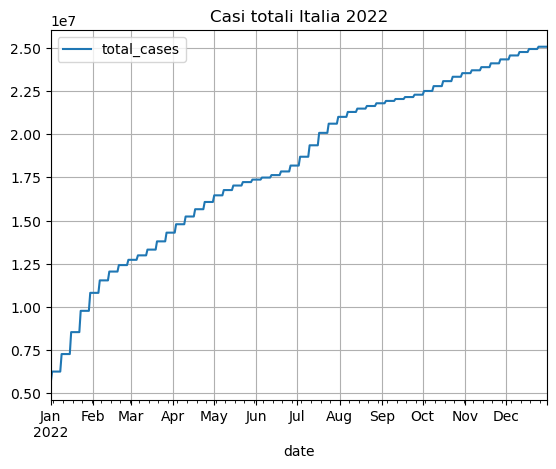

In [9]:
#CON PANDAS IL TREND DEI CASI TOTALI:
maschera_italia_2022.plot(kind='line' , x='date' , y='total_cases' , title='Casi totali Italia 2022')
#QUESTO PER INSERIRE LA GRIGLIA
plt.grid(True)

Text(0.5, 1.0, 'Casi totali Italia 2022')

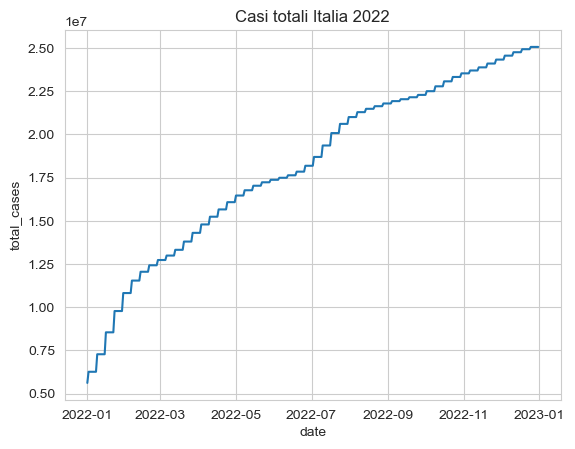

In [10]:
#CON SEABORN IL TREND DEI CASI TOTALI:
#QUESTO PER INSERIRE LA GRIGLIA
sns.set_style('whitegrid')

andamento_italia_2022 = sns.lineplot(data=maschera_italia_2022 , x='date' , y='total_cases')

#QUI PER AGGIUNGERE IL TITOLO AL GRAFICO, NON HO POTUTO UTILIZZARE UN PARAMETRO COME IN PANDAS, MA HO DOVUTO UTILIZZARE UN METODO DI SEABORN
andamento_italia_2022.set_title('Casi totali Italia 2022')       

In [11]:
#QUI HO CREATO UN ULTERIORE FILTRO PER ELIMINARE TUTTI I VALORI ZERO COME DA RICHIESTO NEL PUNTO K PER IL PUNTO B:
filtro_zero = maschera_italia_2022['new_cases'] > 0
maschera_italia_2022_zero = maschera_italia_2022[filtro_zero]

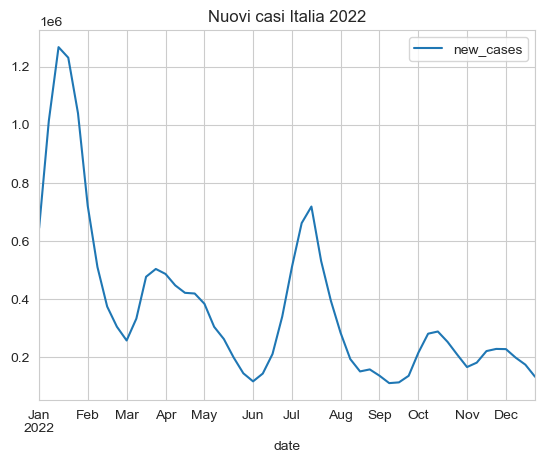

In [47]:
#CON PANDAS IL TREND DEI NUOVI CASI:
maschera_italia_2022_zero.plot(kind='line' , x='date' , y='new_cases' , title='Nuovi casi Italia 2022')
#QUESTO PER INSERIRE LA GRIGLIA
plt.grid(True)

Text(0.5, 1.0, 'Nuovi casi Italia 2022')

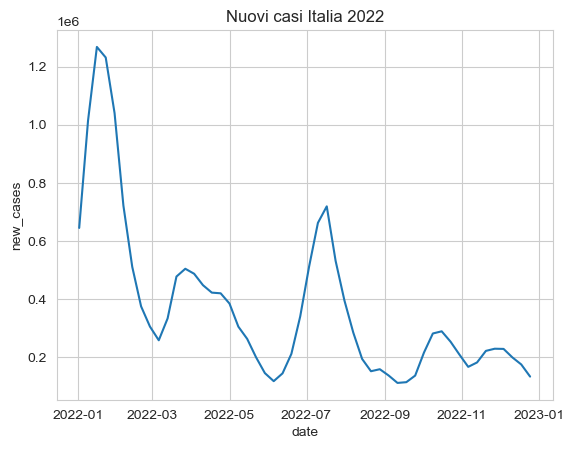

In [46]:
#CON SEABORN IL TREND DEI NUOVI CASI:
#QUESTO PER INSERIRE LA GRIGLIA
sns.set_style('whitegrid')
nuovi_casi_maschera_italia_2022_zero = sns.lineplot(data=maschera_italia_2022_zero , x='date' , y='new_cases')
#QUI PER AGGIUNGERE IL TITOLO AL GRAFICO, NON HO POTUTO UTILIZZARE UN PARAMETRO COME IN PANDAS, MA HO DOVUTO UTILIZZARE UN METODO DI SEABORN
nuovi_casi_maschera_italia_2022_zero.set_title('Nuovi casi Italia 2022') 

# EXTRA DEL PUNTO 3: 
    SVOLGIMENTO DELL'ESERCIZIO MA CON LA RICERCA DI UN PAESE E DI UN ANNO DI PIACIMENTO.

In [16]:
#HO CREATO LA VARIABILE PER L'INPUT DEGLI ANNI:
lista_anni = Covid_19.date.dt.year.unique()
anno = int(input('Inserire un anno da ricercare tra il 2020 ed il 2024:'))

#HO CREATO UN CICLO WHILE PER EVITARE L'INSERIMENTO DI ANNI NON PRESENTI NEL DATAFRAME:
while anno not in lista_anni:
    print("Hai inserito un anno non presente nei dati, si prega di reinserire l'anno da ricercare")
    anno = int(input('Inserire un anno da cercare tra il 2020 ed il 2024:'))

#HO CREATO LA VARIABILE PER L'INPUT DEL PAESE:
lista_paesi = Covid_19.location.unique()
paese = input('Inserire, in inglese, un paese da ricercare:').capitalize()

#HO CREATO UN CICLO WHILE PER EVITARE L'INSERIMENTO DI PAESI NON PRESENTI NEL DATAFRAME:
while paese not in lista_paesi:
    print("Hai inserito un paese non presente nei dati, si prega di reinserire il paese da ricercare")
    paese = input('Inserire, in inglese, un paese da ricercare:').capitalize()

#------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#CREAZIONE DELLA MASCHERA:
filtro_anno = Covid_19.date.dt.year == anno
filtro_paese = Covid_19.location == paese

filtro_paese_anno = Covid_19[filtro_paese][filtro_anno]
maschera_paese_anno = filtro_paese_anno.loc[: , ['location' , 'date' , 'total_cases' , 'new_cases']]

maschera_paese_anno
# HO EFFETTUATO IN ANTICIPO EVENTUALI PROVE PER VERIFICARE L'OUTPUT DI TUTTI I VARI FILTRI PER VERIFICARE CHE FUNZIONASSERO TUTTI CORRETTAMENTE

Inserire un anno da ricercare tra il 2020 ed il 2024: 15184


Hai inserito un anno non presente nei dati, si prega di reinserire l'anno da ricercare


Inserire un anno da cercare tra il 2020 ed il 2024: 644


Hai inserito un anno non presente nei dati, si prega di reinserire l'anno da ricercare


Inserire un anno da cercare tra il 2020 ed il 2024: 2022
Inserire, in inglese, un paese da ricercare: SPAIN


C:\Users\alfim\AppData\Local\Temp\ipykernel_109652\2409838179.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtro_paese_anno = Covid_19[filtro_paese][filtro_anno]


,location,date,total_cases,new_cases
363313,Spain,2022-01-01,6100138.0,0.0
363314,Spain,2022-01-02,6893516.0,793378.0
363315,Spain,2022-01-03,6893516.0,0.0
363316,Spain,2022-01-04,6893516.0,0.0
363317,Spain,2022-01-05,6893516.0,0.0
...,...,...,...,...
363673,Spain,2022-12-27,13754962.0,0.0
363674,Spain,2022-12-28,13754962.0,0.0
363675,Spain,2022-12-29,13754962.0,0.0
363676,Spain,2022-12-30,13754962.0,0.0


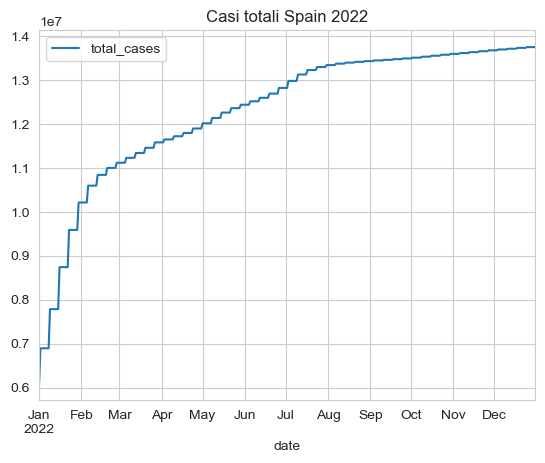

In [17]:
#CON PANDAS IL TREND DEI CASI TOTALI:
maschera_paese_anno.plot(kind='line' , x='date' , y='total_cases' , title=f'Casi totali {paese} {anno}')
#QUESTO PER INSERIRE LA GRIGLIA
plt.grid(True)

Text(0.5, 1.0, 'Casi totali Spain 2022')

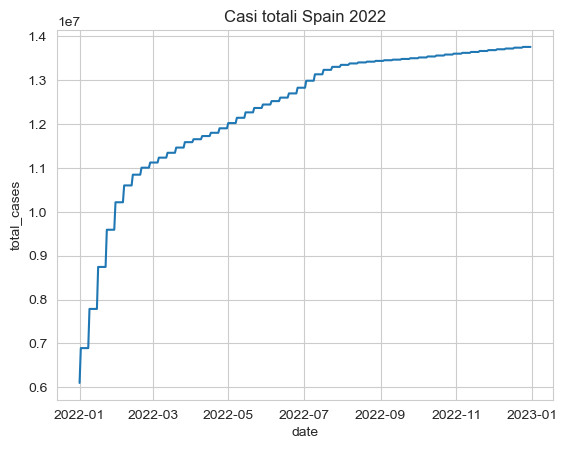

In [18]:
#CON SEABORN IL TREND DEI CASI TOTALI:
#QUESTO PER INSERIRE LA GRIGLIA
sns.set_style('whitegrid')
andamento_paese_anno = sns.lineplot(data=maschera_paese_anno , x='date' , y='total_cases')
#QUI PER AGGIUNGERE IL TITOLO AL GRAFICO, NON HO POTUTO UTILIZZARE UN PARAMETRO COME IN PANDAS, MA HO DOVUTO UTILIZZARE UN METODO DI SEABORN
andamento_paese_anno.set_title(f'Casi totali {paese} {anno}')       

In [19]:
#QUI HO CREATO UN ULTERIORE FILTRO PER ELIMINARE TUTTI I VALORI ZERO COME DA RICHIESTO NEL PUNTO K PER IL PUNTO B:
secondo_filtro_zero = maschera_paese_anno['new_cases'] > 0
maschera_paese_anno_zero = maschera_paese_anno[secondo_filtro_zero]

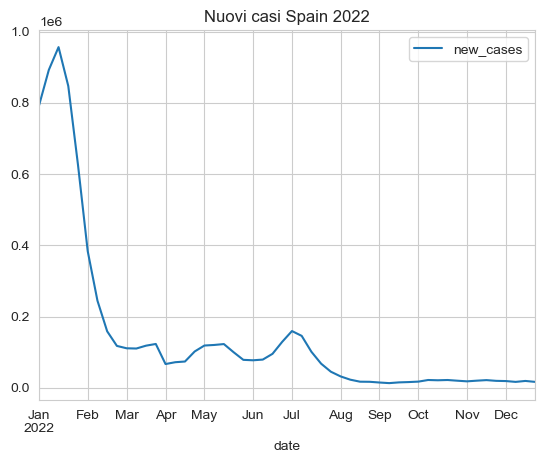

In [48]:
#CON PANDAS IL TREND DEI NUOVI CASI:
maschera_paese_anno_zero.plot(kind='line' , x='date' , y='new_cases' , title=f'Nuovi casi {paese} {anno}')
#QUESTO PER INSERIRE LA GRIGLIA
plt.grid(True)

Text(0.5, 1.0, 'Nuovi casi Spain 2022')

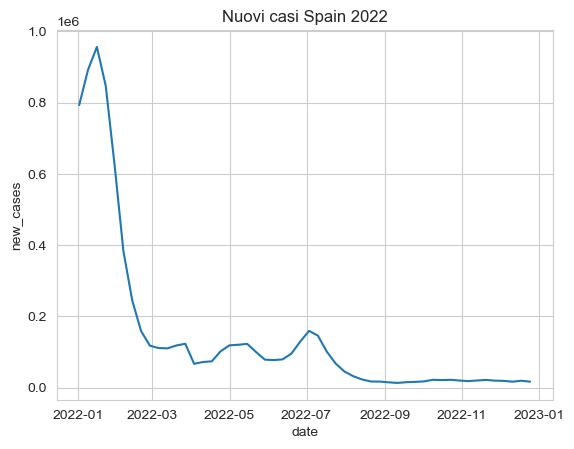

In [49]:
#CON SEABORN IL TREND DEI NUOVI CASI:
#QUESTO PER INSERIRE LA GRIGLIA
sns.set_style('whitegrid')
nuovi_casi_maschera_paese_anno_zero = sns.lineplot(data=maschera_paese_anno_zero , x='date' , y='new_cases')
#QUI PER AGGIUNGERE IL TITOLO AL GRAFICO, NON HO POTUTO UTILIZZARE UN PARAMETRO COME IN PANDAS, MA HO DOVUTO UTILIZZARE UN METODO DI SEABORN
nuovi_casi_maschera_paese_anno_zero.set_title(f'Nuovi casi {paese} {anno}') 

# 4. Riguardo le nazioni di Italia, Germania e Francia mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso):
    a. scrivere un breve commento a riguardo.

In [22]:
# PRIMA MI CREO LA MASCHERA:
# HO CREATO PRIMA LA MASCHERA PER LE DATE:
filtro_maggio_2022 = (Covid_19['date'].dt.month >= 5) & (Covid_19['date'].dt.year == 2022) 
filtro_aprile_2023 = (Covid_19['date'].dt.month <= 4) & (Covid_19['date'].dt.year == 2023)
filtro_date = Covid_19[(filtro_maggio_2022) | (filtro_aprile_2023)]

# DOPODICHE HO USATO ESSA PER CREARCI SOPRA I FILTRI DEI PAESI:
f_italia = filtro_date.location == 'Italy'                      #HO USATO f_italia INVECE DI filtro_italia PER NON SOVRASCRIVERE LA VARIABILE DELLA TRACCIA PRECEDENTE
f_germania = filtro_date.location == 'Germany'
f_francia = filtro_date.location == 'France'
maschera_paesi_date = filtro_date[(f_italia) | (f_germania) | (f_francia)]

# OTTENENDO COSI LA MASCHERA FINALE:
maschera_finale = maschera_paesi_date[['location' , 'date' , 'icu_patients']]

#NON HO POTUTO CONVERTIRE I VALORI DI icu_patients IN INT PERCHE' SONO PRESENTI DEI NaN
maschera_finale
# HO EFFETTUATO IN ANTICIPO EVENTUALI PROVE PER VERIFICARE L'OUTPUT DI TUTTI I VARI FILTRI PER VERIFICARE CHE FUNZIONASSERO TUTTI CORRETTAMENTE

,location,date,icu_patients
131214,France,2022-05-01,1557.0
131215,France,2022-05-02,1511.0
131216,France,2022-05-03,1498.0
131217,France,2022-05-04,1465.0
131218,France,2022-05-05,1447.0
...,...,...,...
186482,Italy,2023-04-26,100.0
186483,Italy,2023-04-27,99.0
186484,Italy,2023-04-28,105.0
186485,Italy,2023-04-29,111.0


Text(0.5, 1.0, 'Analisi icu 05/2022 - 04/2023')

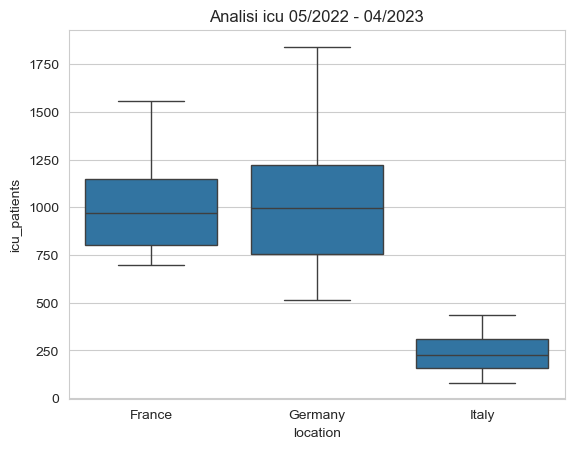

In [42]:
#QUESTO PER INSERIRE LA GRIGLIA
sns.set_style('whitegrid')
Analisi_icu_box = sns.boxplot(data=maschera_finale , x='location' , y='icu_patients')
#QUI PER AGGIUNGERE IL TITOLO AL GRAFICO, NON HO POTUTO UTILIZZARE UN PARAMETRO COME IN PANDAS, MA HO DOVUTO UTILIZZARE UN METODO DI SEABORN
Analisi_icu_box.set_title('Analisi icu 05/2022 - 04/2023')

Text(0.5, 1.0, 'Analisi icu 05/2022 - 04/2023')

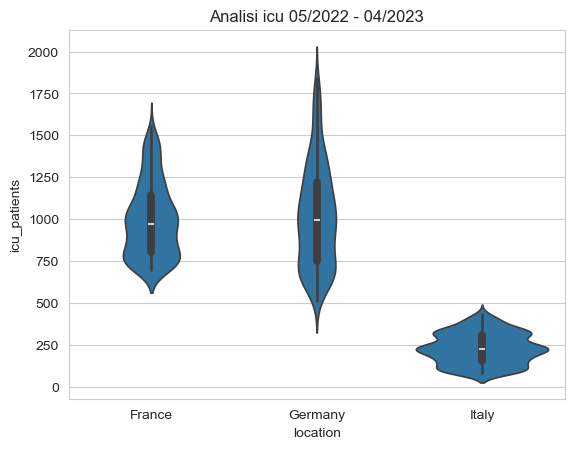

In [24]:
#EXTRA GRAFICO A VIOLINO:
#QUESTO PER INSERIRE LA GRIGLIA
sns.set_style('whitegrid')
Analisi_icu_violin = sns.violinplot(data=maschera_finale , x='location' , y='icu_patients')
#QUI PER AGGIUNGERE IL TITOLO AL GRAFICO, NON HO POTUTO UTILIZZARE UN PARAMETRO COME IN PANDAS, MA HO DOVUTO UTILIZZARE UN METODO DI SEABORN
Analisi_icu_violin.set_title('Analisi icu 05/2022 - 04/2023')

# RISPOSTA AL PUNTO A: 

**L'italia ha avuto molti meno pazienti in terapia intensiva rispetto a germania e francia, probabilmente sara' dovuto alla minore densita' demografica ed alla quantita' di posti letto disponibili, piu' ulteriori fattori che sono elencati tra le colonne ma che servirebbero ulteriori analisi per cercare conferma. 
Per confutare la mia teoria almeno sulla popolazione e sui posti letto ho eseguito delle verifiche:**

In [25]:
# PER VERIFICARE IL MIO COMMENTO SONO ANDATO PRIMA A VERIFICARE CHE NELLE COLONNE POPOLAZONE E LETTI DISPONIBILI NON VARINO:
print(maschera_paesi_date.groupby('location')['population'].unique())
print('\n')
print(maschera_paesi_date.groupby('location')['hospital_beds_per_thousand'].unique())

location
France     [67813000]
Germany    [83369840]
Italy      [59037472]
Name: population, dtype: object


location
France     [5.98]
Germany     [8.0]
Italy      [3.18]
Name: hospital_beds_per_thousand, dtype: object


In [26]:
# COSI L'OUTPUT E' PIU' LEGGIBILE:
maschera_paesi_date.groupby('location')[['population', 'hospital_beds_per_thousand']].max()

,population,hospital_beds_per_thousand
location,,
France,67813000,5.98
Germany,83369840,8.00
Italy,59037472,3.18


# EXTRA DEL PUNTO 4: 
    SVOLGIMENTO DELL'ESERCIZIO MA CON LA RICERCA DI PIU' PAESI E DI PIU' PERIODI A PIACIMENTO.

In [28]:
#HO CREATO LA VARIABILE PER L'INPUT DEGLI ANNI:

#HO CREATO LA VARIABILE PER L'INPUT DEL PRIMO ANNO:
lista_anni = Covid_19.date.dt.year.unique()
anno_iniziale = int(input('Inserire un anno di partenza da ricercare tra il 2020 ed il 2024:'))

#HO CREATO UN CICLO WHILE PER EVITARE L'INSERIMENTO DI ANNI NON PRESENTI NEL DATAFRAME:
while anno_iniziale not in lista_anni:
    print("Hai inserito un anno non presente nei dati, si prega di reinserire l'anno da ricercare")
    anno_iniziale = int(input('Inserire un anno di partenza da ricercare tra il 2020 ed il 2024:'))

#HO CREATO LA VARIABILE PER L'INPUT DEL SECONDO ANNO:
anno_finale = int(input('Inserire un anno di termine da ricercare tra il 2020 ed il 2024:'))

#HO CREATO UN CICLO WHILE PER EVITARE L'INSERIMENTO DI ANNI NON PRESENTI NEL DATAFRAME:
while anno_finale not in lista_anni or anno_finale < anno_iniziale:
    print("Hai inserito un anno non presente nei dati oppure un anno finale antecedente all'iniziale. Si prega di reinserire l'anno da ricercare")
    anno_finale = int(input('Inserire un anno di termine da ricercare tra il 2020 ed il 2024:'))

#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#HO CREATO LA VARIABILE PER L'INPUT DEI MESI:

#HO CREATO LA VARIABILE PER L'INPUT DEL PRIMO MESE:
lista_mesi = Covid_19.date.dt.month.unique()
mese_1 = int(input('Inserire il mese di partenza da ricercare:'))

#HO CREATO UN CICLO WHILE PER EVITARE L'INSERIMENTO DI MESI INESISTENTI:
while mese_1 not in lista_mesi:
    print("Hai inserito un mese non esistente, si prega di reinserire il mese da ricercare:")
    mese_1 = int(input('Inserire il mese di partenza da ricercare:'))

#HO CREATO LA VARIABILE PER L'INPUT DEL SECONDO MESE:
mese_2 = int(input('Inserire il mese di termine da ricercare:'))

#HO CREATO UN CICLO WHILE PER EVITARE L'INSERIMENTO DI MESI INESISTENTI:
while mese_2 not in lista_mesi:
    print("Hai inserito un mese non esistente, si prega di reinserire il mese da ricercare:")
    mese_2 = int(input('Inserire il mese di termine da ricercare:'))

# --------------------------------------------------------------------------------------------------------------------------------------------------------------------

#INPUT DEI PAESI:

#HO CREATO LE VARIABILI PER L'INPUT DEL PRIMO PAESE:
lista_paesi = Covid_19.location.unique()
paese_1 = input('Inserire, in inglese, un paese da ricercare:').capitalize()

#HO CREATO UN CICLO WHILE PER EVITARE L'INSERIMENTO DI PAESI NON PRESENTI NEL DATAFRAME:
while paese_1 not in lista_paesi:
    print("Hai inserito un paese non presente nei dati, si prega di reinserire il paese da ricercare")
    paese_1 = input('Inserire, in inglese, un paese da ricercare:').capitalize()

#STESSA COSA PER IL SECONDO PAESE:
paese_2 = input('Inserire, in inglese, un paese da ricercare:').capitalize()

while paese_2 not in lista_paesi:
    print("Hai inserito un paese non presente nei dati, si prega di reinserire il paese da ricercare")
    paese_2 = input('Inserire, in inglese, un paese da ricercare:').capitalize()

#STESSA COSA PER IL TERZO:
paese_3 = input('Inserire, in inglese, un paese da ricercare:').capitalize()

while paese_3 not in lista_paesi:
    print("Hai inserito un paese non presente nei dati, si prega di reinserire il paese da ricercare")
    paese_3 = input('Inserire, in inglese, un paese da ricercare:').capitalize()

# ---------------------------------------------------------------------------------------------------------------------------------------------------------

# PRIMA MI CREO LA MASCHERA:
# HO CREATO PRIMA LA MASCHERA PER LE DATE:
filtro_periodo_iniziale = (Covid_19['date'].dt.month >= mese_1) & (Covid_19['date'].dt.year == anno_iniziale) 
filtro_periodo_finale = (Covid_19['date'].dt.month <= mese_2) & (Covid_19['date'].dt.year == anno_finale)
filtro_periodo = Covid_19[(filtro_periodo_iniziale) | (filtro_periodo_finale)]

# DOPODICHE HO USATO ESSA PER CREARCI SOPRA I FILTRI DEI PAESI:
f_paese_1 = filtro_periodo.location == paese_1                      #HO CAMBIATO NOMI ALLE VARIABILI PER NON SOVRASCRIVERLE
f_paese_2 = filtro_periodo.location == paese_2
f_paese_3 = filtro_periodo.location == paese_3
maschera_paesi_periodo = filtro_periodo[(f_paese_1) | (f_paese_2) | (f_paese_3)]

# OTTENENDO COSI LA MASCHERA FINALE:
maschera_extra_finale = maschera_paesi_periodo[['location' , 'date' , 'icu_patients']]

#NON HO POTUTO CONVERTIRE I VALORI DI icu_patients IN INT PERCHE' SONO PRESENTI DEI NaN
maschera_extra_finale
# HO EFFETTUATO IN ANTICIPO EVENTUALI PROVE PER VERIFICARE L'OUTPUT DI TUTTI I VARI FILTRI PER VERIFICARE CHE FUNZIONASSERO TUTTI CORRETTAMENTE

Inserire un anno di partenza da ricercare tra il 2020 ed il 2024: 224435


Hai inserito un anno non presente nei dati, si prega di reinserire l'anno da ricercare


Inserire un anno di partenza da ricercare tra il 2020 ed il 2024: 543


Hai inserito un anno non presente nei dati, si prega di reinserire l'anno da ricercare


Inserire un anno di partenza da ricercare tra il 2020 ed il 2024: 2022
Inserire un anno di termine da ricercare tra il 2020 ed il 2024: 2020


Hai inserito un anno non presente nei dati oppure un anno finale antecedente all'iniziale. Si prega di reinserire l'anno da ricercare


Inserire un anno di termine da ricercare tra il 2020 ed il 2024: 2023
Inserire il mese di partenza da ricercare: 6
Inserire il mese di termine da ricercare: 8
Inserire, in inglese, un paese da ricercare: SPAIN
Inserire, in inglese, un paese da ricercare: ITALY
Inserire, in inglese, un paese da ricercare: FRANCE


,location,date,icu_patients
131245,France,2022-06-01,929.0
131246,France,2022-06-02,926.0
131247,France,2022-06-03,917.0
131248,France,2022-06-04,917.0
131249,France,2022-06-05,914.0
...,...,...,...
363916,Spain,2023-08-27,NaN
363917,Spain,2023-08-28,NaN
363918,Spain,2023-08-29,NaN
363919,Spain,2023-08-30,NaN


Text(0.5, 1.0, 'Analisi icu 6/2022 - 8/2023')

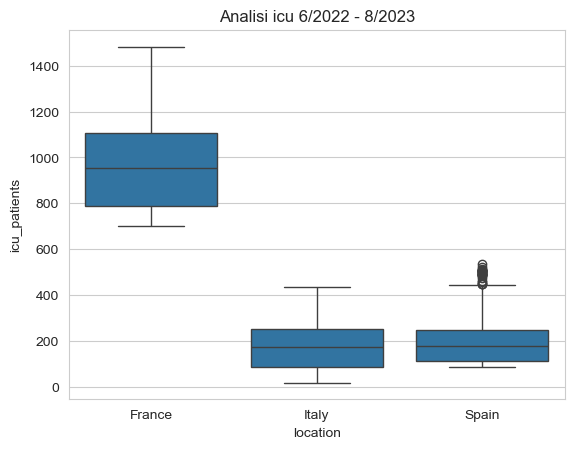

In [41]:
#QUESTO PER INSERIRE LA GRIGLIA
sns.set_style('whitegrid')
Analisi_icu_extra_box = sns.boxplot(data=maschera_extra_finale , x='location' , y='icu_patients')
#QUI PER AGGIUNGERE IL TITOLO AL GRAFICO, NON HO POTUTO UTILIZZARE UN PARAMETRO COME IN PANDAS, MA HO DOVUTO UTILIZZARE UN METODO DI SEABORN
Analisi_icu_extra_box.set_title(f'Analisi icu {mese_1}/{anno_iniziale} - {mese_2}/{anno_finale}')

Text(0.5, 1.0, 'Analisi icu 6/2022 - 8/2023')

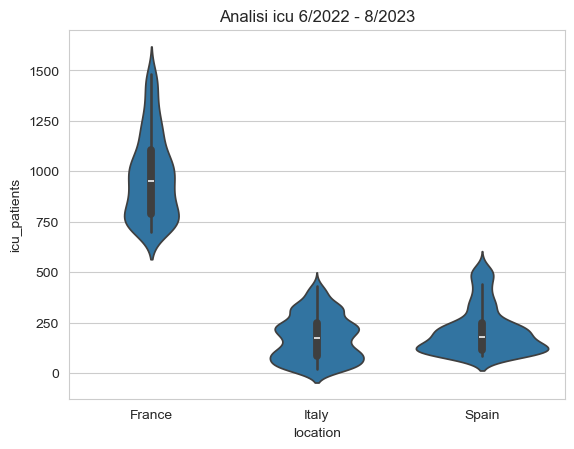

In [30]:
#GRAFICO A VIOLINO:
#QUESTO PER INSERIRE LA GRIGLIA
sns.set_style('whitegrid')
Analisi_icu_extra_violin = sns.violinplot(data=maschera_extra_finale , x='location' , y='icu_patients')
#QUI PER AGGIUNGERE IL TITOLO AL GRAFICO, NON HO POTUTO UTILIZZARE UN PARAMETRO COME IN PANDAS, MA HO DOVUTO UTILIZZARE UN METODO DI SEABORN
Analisi_icu_extra_violin.set_title(f'Analisi icu {mese_1}/{anno_iniziale} - {mese_2}/{anno_finale}')

# 5. Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2023:
    a. mostrare la somma dei pazienti ospitalizzati per ognuna;
    b. se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno.

In [31]:
# PRIMA MI CREO LA MASCHERA:
# HO CREATO PRIMA LA MASCHERA PER L'ANNO:
filtro_2023 = Covid_19['date'].dt.year == 2023
maschera_2023 = Covid_19[filtro_2023]

# DOPODICHE HO USATO ESSA PER CREARCI SOPRA I FILTRI DEI PAESI:
# QUI HO DOVUTO FARE ATTENZIONE AI NOMI DELLE VARIABILI, DOVENDO ESSERE ESPLICATIVI E AVENDONE GIA USATI ALTRI DI SIMILI, 
# PER QUESTO MOTIVO ME LE ERO SEGNATE, PER NON RIUTILIZZARE LE STESSE SOVRASCRIVENDOLE.
f2_italia = maschera_2023.location == 'Italy' 
f2_germania = maschera_2023.location == 'Germany'
f2_francia = maschera_2023.location == 'France'
filtro_spagna = maschera_2023.location == 'Spain'
maschera_paesi_2023 = maschera_2023[(f2_italia) | (f2_germania) | (f2_francia) | (filtro_spagna)]

# OTTENENDO COSI LA MASCHERA FINALE:
maschera_finale_2 = maschera_paesi_2023[['location' , 'date' , 'hosp_patients']]

#NON HO POTUTO CONVERTIRE I VALORI DI hosp_patients IN INT PERCHE' SONO PRESENTI DEI NaN
maschera_finale_2
# HO EFFETTUATO IN ANTICIPO EVENTUALI PROVE PER VERIFICARE L'OUTPUT DI TUTTI I VARI FILTRI PER VERIFICARE CHE FUNZIONASSERO TUTTI CORRETTAMENTE

,location,date,hosp_patients
131459,France,2023-01-01,24157.0
131460,France,2023-01-02,24075.0
131461,France,2023-01-03,23516.0
131462,France,2023-01-04,23167.0
131463,France,2023-01-05,22664.0
...,...,...,...
364038,Spain,2023-12-27,NaN
364039,Spain,2023-12-28,NaN
364040,Spain,2023-12-29,NaN
364041,Spain,2023-12-30,NaN


**LE COLONNE IN QUESTIONE SONO 2 MA ENTRAMBE, QUINDI ANCHE QUELLA PRESA IN CONSIDERAZIONE DA ME PER L'ESECUZIONE DELL'ESERCIZIO, PRESENTANO VALORI SFASATI, DI CONSEGUENZA ANDANDO AD ESEGUIRE UNA SEMPLICE SOMMA SU DI ESSA, DIVISA PER PAESI, RISULTERA' IN VALORI SBALLATI IN QUANTO I VALORI PRESENTI PRESENTANO QUASI SEMPRE GLI STESSI PAZIENTI COME PER LA COLONNA TOTAL CASES DEL SECONDO ESERCIZIO.**

In [32]:
# CALCOLO:
calcolo = maschera_finale_2.groupby('location').hosp_patients.agg(hosp_patients = ('sum')) 

#HO CONVERTITO I FLOAT IN INTERI DATO CHE RESTITUIVANO TUTTI VALORI DECIMALI CON LO ZERO
calcolo.hosp_patients = calcolo.hosp_patients.astype('int')
calcolo

,hosp_patients
location,
France,1382574
Germany,0
Italy,1175272
Spain,354602


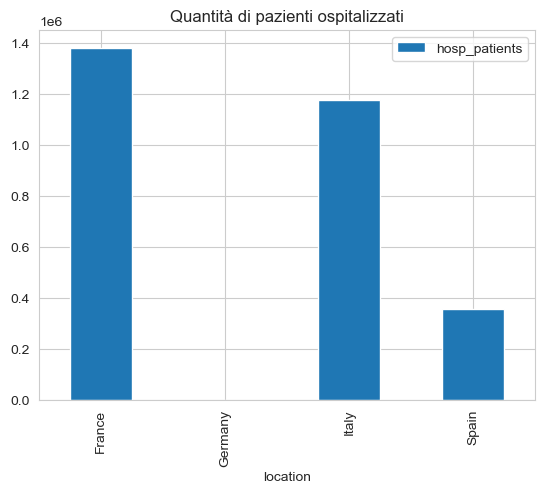

In [33]:
# GRAFICO IN PANDAS:
calcolo.plot(kind='bar' , title='Quantità di pazienti ospitalizzati')
#QUESTO PER INSERIRE LA GRIGLIA
plt.grid(True)

C:\Users\alfim\AppData\Local\Temp\ipykernel_109652\87308701.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico_pazienti_ospitalizzati = sns.barplot(data=calcolo , x='location' , y='hosp_patients' , palette="rainbow_r")


Text(0.5, 1.0, 'Quantità di pazienti ospitalizzati')

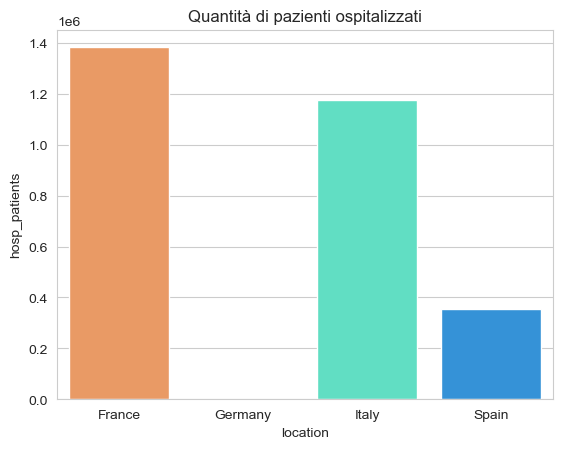

In [45]:
# GRAFICO IN SEABORN:
#QUESTO PER INSERIRE LA GRIGLIA
sns.set_style('whitegrid')
grafico_pazienti_ospitalizzati = sns.barplot(data=calcolo , x='location' , y='hosp_patients' , palette="rainbow_r")
#QUI PER AGGIUNGERE IL TITOLO AL GRAFICO, NON HO POTUTO UTILIZZARE UN PARAMETRO COME IN PANDAS, MA HO DOVUTO UTILIZZARE UN METODO DI SEABORN
grafico_pazienti_ospitalizzati.set_title('Quantità di pazienti ospitalizzati')

<Axes: title={'center': 'Quantità di pazienti ospitalizzati'}, ylabel='hosp_patients'>

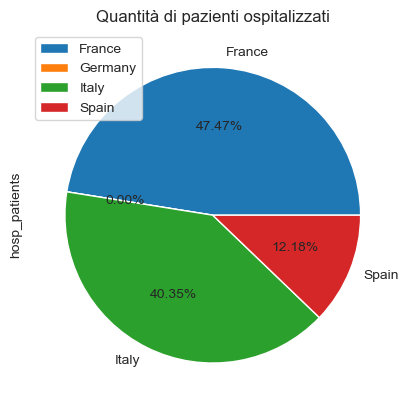

In [35]:
#EXTRA GRAFICO A TORTE:
calcolo.plot(kind='pie' , y='hosp_patients' , autopct='%.2f%%' , title='Quantità di pazienti ospitalizzati')

# RISPOSTA AL PUNTO B:

**A seguito di differenti considerazioni come: mancanza di spiegazione dei nulli, nelle descrizioni delle relative colonne di riferimento/prese in considerazione, sul sito GitHub da dove è stato ricavato il Dataset, ed anche di diverse verifiche output con altre colonne (es.: degli andamenti), e quindi con altri fattori ed elementi per capire il significato dei nulli nei diversi paesi per quanto riguarda appunto la colonna hosp_patients, non si riescono a spiegare il valore di questi NaN e di conseguenza non è valutabile l'opzione di sostituirli/rimpiazzarli in un qualche modo.**